In [596]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import random
from sklearn.utils import shuffle
from scipy import stats
import pylab
from sklearn import metrics
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm
pd.set_option('display.max_colwidth', None)
pd.set_option('display.width', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import warnings
warnings.filterwarnings("ignore")
from tabulate import tabulate
from matplotlib import rcParams
import scipy
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

In [461]:
df = pd.read_csv('DatiumSample.rpt', sep='\t')

In [462]:
df.isnull().sum()

Make                                  0
Model                                 0
MakeCode                              0
FamilyCode                            0
YearGroup                             0
MonthGroup                            0
SequenceNum                           0
Description                           0
CurrentRelease                        0
ImportFlag                            0
LimitedEdition                        0
Series                             1016
SeriesModelYear                   40986
BadgeDescription                   7418
BadgeSecondaryDescription         58428
BodyStyleDescription                  0
BodyConfigDescription             51078
WheelBaseConfig                   60000
Roofline                          61472
ExtraIdentification               57997
DriveDescription                      0
DriveCode                             0
GearTypeDescription                   0
GearLocationDescription               4
GearNum                              10


In [463]:
# since we have only 4 missing values on target variable, it can be dropped
df_cars = df[df['Sold_Amount'].notna()]

In [464]:
# drop some columns as per the instruction and additional columns that isn't important 
df_cars.drop(['AvgWholesale', 'AvgRetail', 'GoodWholesale', 'GoodRetail', 'TradeMin', 'TradeMax', 'PrivateMax', 'SequenceNum', 'Series', 'VIN'], inplace=True, axis=1)

In [465]:
df_cars['Sold_Year'] = pd.DatetimeIndex(df_cars['Sold_Date']).year

In [466]:
# drop columns with Description
drop_desc = df_cars.columns[df_cars.columns.str.endswith('Description')]
df_cars.drop(drop_desc, axis=1, inplace=True)

In [467]:
# drop missing values with more than 50 percent
percentage_null = df_cars.isnull().sum() / len(df_cars)
missing_features = percentage_null[percentage_null > 0.50].index
df_cars.drop(missing_features, axis=1, inplace=True)

In [468]:
# train and test split

In [469]:
X = df_cars.drop('Sold_Amount',axis=1)
y = df_cars['Sold_Amount']

In [470]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75, test_size = 0.25, random_state=10)


In [471]:
df_cars.dtypes[df_cars.dtypes != "object"].index

Index(['YearGroup', 'MonthGroup', 'GearNum', 'DoorNum', 'EngineSize',
       'Cylinders', 'FuelCapacity', 'GrossVehicleMass', 'WheelBase', 'Height',
       'Length', 'Width', 'KerbWeight', 'TareMass', 'PayLoad', 'Power',
       'PowerRPMTo', 'Torque', 'TorqueRPMTo', 'RonRating', 'SeatCapacity',
       'ValvesCylinder', 'TowingBrakes', 'TowingNoBrakes', 'WarrantyYears',
       'WarrantyKM', 'FirstServiceKM', 'FirstServiceMonths',
       'RegServiceMonths', 'GreenhouseRating', 'AirpollutionRating',
       'OverallGreenStarRating', 'CO2Combined', 'FuelUrban', 'FuelExtraurban',
       'FuelCombined', 'AncapRating', 'AverageKM', 'GoodKM', 'NewPrice',
       'Age_Comp_Months', 'KM', 'Sold_Amount', 'Sold_Year'],
      dtype='object')

In [472]:
df_cars.dtypes[df_cars.dtypes == "object"].index

Index(['Make', 'Model', 'MakeCode', 'FamilyCode', 'CurrentRelease',
       'ImportFlag', 'LimitedEdition', 'DriveCode', 'OptionCategory',
       'ModelCode', 'EngineLocation', 'EngineNum', 'FrontTyreSize',
       'RearTyreSize', 'FrontRimDesc', 'RearRimDesc', 'VFactsClass',
       'VFactsSegment', 'VFactsPrice', 'IsPPlateApproved', 'Colour', 'Branch',
       'SaleCategory', 'Sold_Date', 'Compliance_Date'],
      dtype='object')

In [473]:
numerical = ['YearGroup', 'MonthGroup', 'GearNum', 'DoorNum', 'EngineSize',
       'Cylinders', 'FuelCapacity', 'GrossVehicleMass', 'WheelBase', 'Height',
       'Length', 'Width', 'KerbWeight', 'TareMass', 'PayLoad', 'Power',
       'PowerRPMTo', 'Torque', 'TorqueRPMTo', 'RonRating', 'SeatCapacity',
       'ValvesCylinder', 'TowingBrakes', 'TowingNoBrakes', 'WarrantyYears',
       'WarrantyKM', 'FirstServiceKM', 'FirstServiceMonths',
       'RegServiceMonths', 'GreenhouseRating', 'AirpollutionRating',
       'OverallGreenStarRating', 'CO2Combined', 'FuelUrban', 'FuelExtraurban',
       'FuelCombined', 'AncapRating', 'AverageKM', 'GoodKM', 'NewPrice',
       'Age_Comp_Months', 'KM', 'Sold_Year']

In [474]:
categorical = ['Make', 'Model', 'MakeCode', 'FamilyCode', 'CurrentRelease',
       'ImportFlag', 'LimitedEdition', 'DriveCode', 'OptionCategory',
       'ModelCode', 'EngineLocation', 'EngineNum', 'FrontTyreSize',
       'RearTyreSize', 'FrontRimDesc', 'RearRimDesc', 'VFactsClass',
       'VFactsSegment', 'VFactsPrice', 'IsPPlateApproved', 'Colour', 'Branch',
       'SaleCategory', 'Sold_Date', 'Compliance_Date']

In [475]:
X_train_numerical = X_train[numerical]
X_test_numerical = X_test[numerical]

In [476]:
X_train_categorical = X_train[categorical]
X_test_categorical = X_test[categorical]

In [477]:
for i in X_train_numerical.columns[X_train_numerical.isnull().any(axis=0)]:     #---Applying Only on variables with NaN values
    X_train_numerical[i].fillna(X_train_numerical[i].mean(),inplace=True)

In [478]:
for i in X_test_numerical.columns[X_test_numerical.isnull().any(axis=0)]:     #---Applying Only on variables with NaN values
    X_test_numerical[i].fillna(X_train_numerical[i].mean(),inplace=True)

In [479]:
X_test_categorical = X_test_categorical.fillna(X_train_categorical.mode().iloc[0])

In [480]:
X_train_categorical = X_train_categorical.fillna(X_train_categorical.mode().iloc[0])

In [481]:
X_train_numerical.isnull().sum()

YearGroup                 0
MonthGroup                0
GearNum                   0
DoorNum                   0
EngineSize                0
Cylinders                 0
FuelCapacity              0
GrossVehicleMass          0
WheelBase                 0
Height                    0
Length                    0
Width                     0
KerbWeight                0
TareMass                  0
PayLoad                   0
Power                     0
PowerRPMTo                0
Torque                    0
TorqueRPMTo               0
RonRating                 0
SeatCapacity              0
ValvesCylinder            0
TowingBrakes              0
TowingNoBrakes            0
WarrantyYears             0
WarrantyKM                0
FirstServiceKM            0
FirstServiceMonths        0
RegServiceMonths          0
GreenhouseRating          0
AirpollutionRating        0
OverallGreenStarRating    0
CO2Combined               0
FuelUrban                 0
FuelExtraurban            0
FuelCombined        

In [482]:
X_train_categorical.isnull().sum()

Make                0
Model               0
MakeCode            0
FamilyCode          0
CurrentRelease      0
ImportFlag          0
LimitedEdition      0
DriveCode           0
OptionCategory      0
ModelCode           0
EngineLocation      0
EngineNum           0
FrontTyreSize       0
RearTyreSize        0
FrontRimDesc        0
RearRimDesc         0
VFactsClass         0
VFactsSegment       0
VFactsPrice         0
IsPPlateApproved    0
Colour              0
Branch              0
SaleCategory        0
Sold_Date           0
Compliance_Date     0
dtype: int64

In [483]:
X_train_imputed = pd.concat([X_train_categorical, X_train_numerical], axis=1)

In [484]:
X_test_imputed = pd.concat([X_test_categorical, X_test_numerical], axis=1)

In [485]:
## some analytics and distribution plot since we have all information
## using only train set for analytics as i'm treating the test as completely different data

In [486]:
rcParams['figure.figsize'] = 11.7,8.27

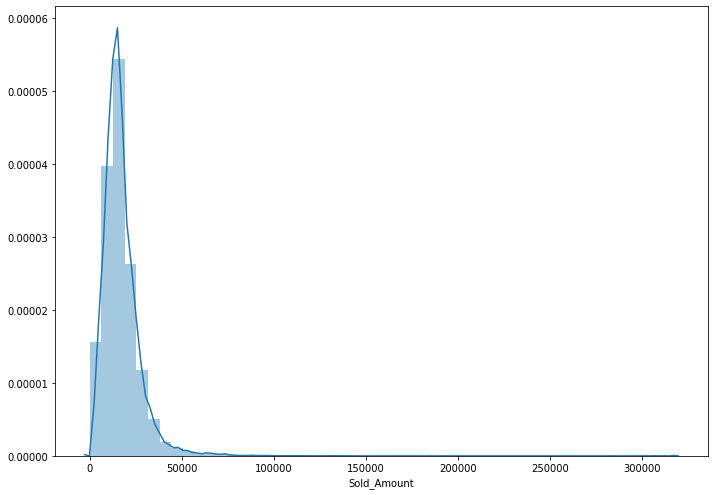

In [487]:
sns.distplot(df_cars.Sold_Amount, hist=True)

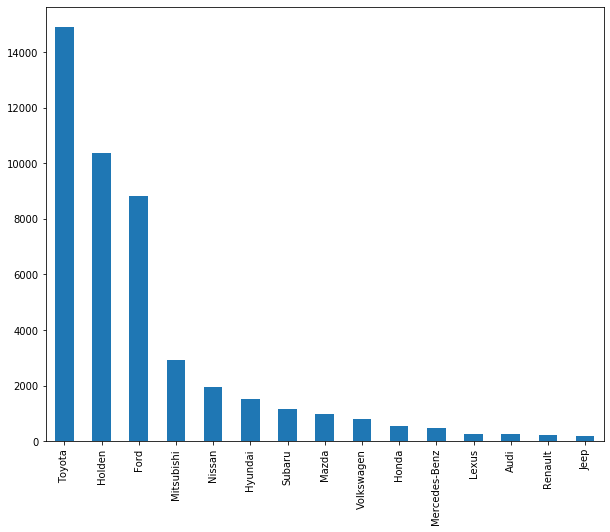

In [488]:
plt.figure(figsize=(10,8))
X_train_imputed.Make.value_counts()[0:15].plot.bar()

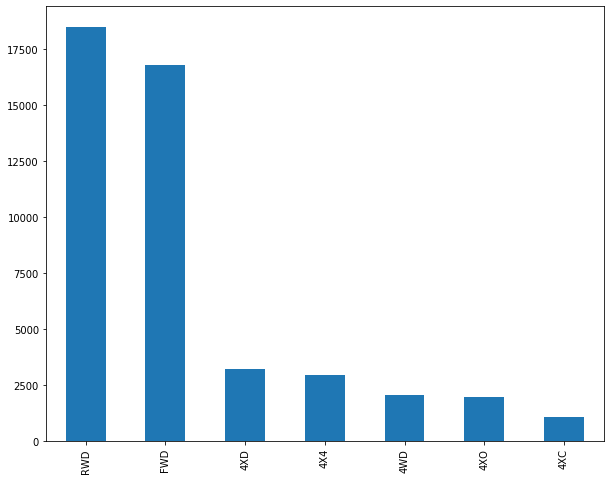

In [489]:
plt.figure(figsize=(10,8))
X_train_imputed.DriveCode.value_counts().plot.bar()

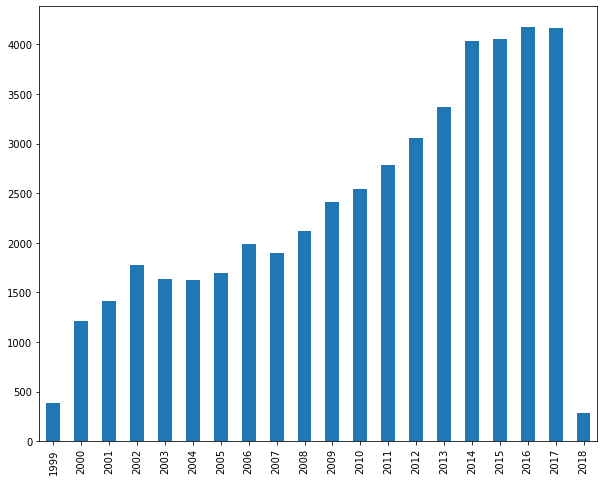

In [490]:
plt.figure(figsize=(10,8))
X_train_imputed['Sold_Year'].value_counts().sort_index().plot(kind='bar')

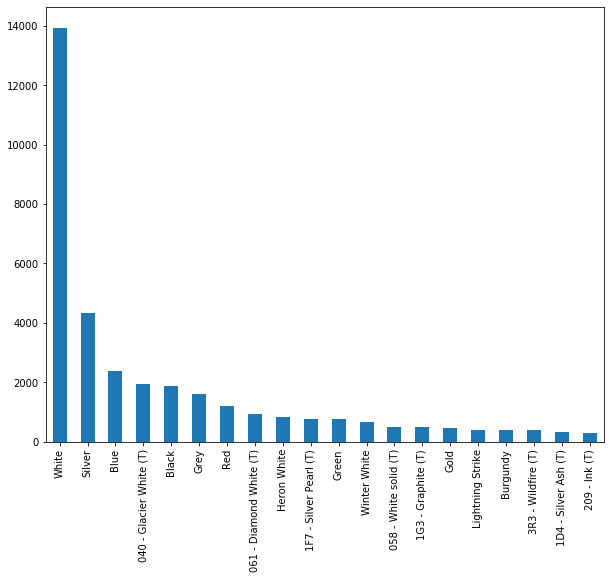

In [491]:
## top 20 colours that was sold the most 
plt.figure(figsize=(10,8))
X_train_imputed.Colour.value_counts()[0:20].plot.bar()

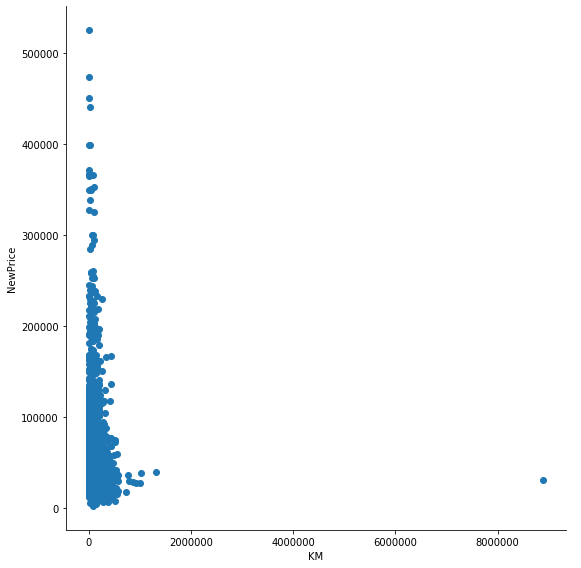

In [492]:
#sns.set_style("darkgrid")
sns.FacetGrid(df_cars,height=8).map(plt.scatter,"KM","NewPrice").add_legend()
#plt.show()

In [493]:
## in a scenario where outlier needs to be removed
X_train_imputed.describe()

,YearGroup,MonthGroup,GearNum,DoorNum,EngineSize,Cylinders,FuelCapacity,GrossVehicleMass,WheelBase,Height,Length,Width,KerbWeight,TareMass,PayLoad,Power,PowerRPMTo,Torque,TorqueRPMTo,RonRating,SeatCapacity,ValvesCylinder,TowingBrakes,TowingNoBrakes,WarrantyYears,WarrantyKM,FirstServiceKM,FirstServiceMonths,RegServiceMonths,GreenhouseRating,AirpollutionRating,OverallGreenStarRating,CO2Combined,FuelUrban,FuelExtraurban,FuelCombined,AncapRating,AverageKM,GoodKM,NewPrice,Age_Comp_Months,KM,Sold_Year
count,46641.000000,46641.000000,46641.000000,46641.000000,46641.000000,46641.000000,46641.000000,46641.000000,46641.000000,46641.00000,46641.000000,46641.000000,46641.000000,46641.000000,46641.000000,46641.000000,46641.000000,46641.000000,46641.000000,46641.000000,46641.000000,46641.000000,46641.000000,46641.000000,46641.000000,46641.000000,46641.000000,46641.000000,46641.000000,46641.000000,46641.000000,46641.000000,46641.000000,46641.000000,46641.000000,46641.000000,46641.000000,46641.000000,46641.000000,46641.000000,46641.000000,4.664100e+04,46641.000000
mean,2006.521837,1.506807,4.768517,4.157136,2926.418323,4.967818,71.568305,2372.580975,2801.260928,1585.46147,4769.524843,1813.307924,1597.350591,1563.343588,774.406624,136.155516,5244.297473,288.200306,3450.494601,91.281992,4.901802,3.598313,1811.642810,637.289583,3.130451,91365.085141,6991.090837,5.356910,9.458284,5.820184,5.877590,3.370961,225.803835,11.400737,7.045712,9.270589,4.386321,272.189792,167.822754,37093.366874,46.414220,8.487928e+04,2010.397654
std,5.689673,2.996067,1.071922,0.867205,924.881090,1.123397,21.762082,401.579820,200.412235,182.32691,322.902062,77.382752,283.463646,254.860886,222.257634,41.450685,937.412824,91.872106,873.081601,0.967443,1.280474,0.792577,638.363833,132.690162,0.519988,33303.706926,4033.018844,2.721402,2.294425,0.836144,1.364474,0.550368,42.264235,2.121229,1.093408,2.026493,0.500733,148.321682,93.145634,15482.352567,34.384929,7.363626e+04,5.101819
min,1962.000000,0.000000,1.000000,2.000000,659.000000,2.000000,33.000000,970.000000,1390.000000,1070.00000,2500.000000,1370.000000,640.000000,720.000000,260.000000,32.000000,2600.000000,69.000000,1200.000000,91.000000,2.000000,2.000000,200.000000,100.000000,1.000000,-1.000000,1000.000000,1.000000,3.000000,1.500000,0.500000,0.500000,44.000000,3.400000,3.500000,1.900000,1.000000,20.000000,10.000000,2478.000000,0.000000,0.000000e+00,1999.000000
25%,2003.000000,0.000000,4.000000,4.000000,2199.000000,4.000000,60.000000,2100.000000,2670.000000,1460.00000,4615.000000,1760.000000,1454.000000,1450.000000,635.000000,105.000000,4800.000000,218.000000,2750.000000,91.000000,5.000000,4.000000,1300.000000,500.000000,3.000000,100000.000000,5000.000000,3.000000,9.000000,5.500000,5.877590,3.370961,210.000000,10.900000,6.800000,8.100000,4.000000,150.000000,90.000000,29500.000000,26.000000,4.080800e+04,2006.000000
50%,2007.000000,0.000000,5.000000,4.000000,2972.000000,4.000000,70.000000,2372.580975,2788.000000,1488.00000,4837.000000,1820.000000,1590.000000,1563.343588,774.406624,129.000000,5250.000000,304.000000,3600.000000,91.000000,5.000000,4.000000,1800.000000,650.000000,3.000000,100000.000000,6991.090837,5.356910,9.458284,5.820184,5.877590,3.370961,225.803835,11.400737,7.045712,9.200000,4.386321,250.000000,150.000000,35130.000000,39.000000,6.906500e+04,2011.000000
75%,2011.000000,1.000000,6.000000,5.000000,3791.000000,6.000000,75.000000,2620.000000,2921.000000,1715.00000,4950.000000,1864.000000,1731.000000,1648.000000,774.406624,157.000000,6000.000000,356.000000,4100.000000,91.281992,5.000000,4.000000,2250.000000,750.000000,3.000000,100000.000000,6991.090837,5.356910,12.000000,6.000000,6.500000,3.500000,245.000000,11.500000,7.200000,10.500000,5.000000,375.000000,225.000000,41790.000000,56.000000,1.164200e+05,2015.000000
max,2017.000000,12.000000,9.000000,5.000000,7300.000000,12.000000,180.000000,5670.000000,4332.000000,2930.00000,7345.000000,2374.000000,3222.000000,2942.000000,2701.000000,386.000000,8500.000000,800

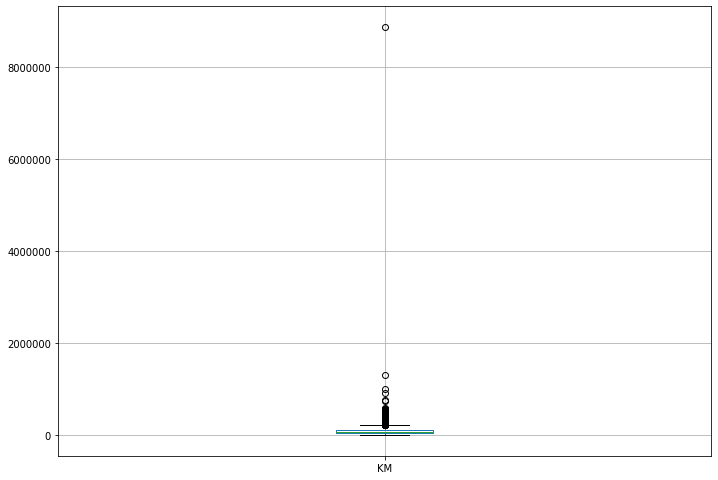

In [494]:
## pointing out an obvious outlier in KM
X_train_imputed.boxplot(column =['KM'], grid = True)

In [495]:
## dropping these columns as they have many sub-categories and lead to a very complex model
X_train_imputed.drop(['Model', 'MakeCode', 'FamilyCode', 'ImportFlag',
                          'ModelCode', 'FrontTyreSize', 'RearRimDesc', 'FrontRimDesc', 'RearTyreSize', 
                          'VFactsPrice', 'Colour', 'Branch', 'Sold_Date', 'Compliance_Date',
                          'EngineNum', 'Make'], inplace=True, axis=1)

In [496]:
## dropping these columns as they have many sub-categories and lead to a very complex model
X_test_imputed.drop(['Model', 'MakeCode', 'FamilyCode', 'ImportFlag',
                          'ModelCode', 'FrontTyreSize', 'RearRimDesc', 'FrontRimDesc', 'RearTyreSize', 
                          'VFactsPrice', 'Colour', 'Branch', 'Sold_Date', 'Compliance_Date',
                          'EngineNum', 'Make'], inplace=True, axis=1)

In [497]:
## feature engieering numerical features
## first only keeping features that contributes to the target variable
### remove features that has correlation with each other 

In [498]:
df_y_train = pd.DataFrame(y_train)
df_y_train.columns = df_y_train.columns

In [499]:
df_y_train.head()

,Sold_Amount
29581,11450.0
37359,22000.0
58542,7900.0
19501,22200.0
56770,16800.0


In [500]:
check_for_sold_amt_correlation = pd.concat([X_train_imputed, df_y_train], axis=1)

In [501]:
## check for featuers that could add value to sold amount 
strong_features_for_sold_amt = check_for_sold_amt_correlation.corrwith(check_for_sold_amt_correlation["Sold_Amount"]).to_frame('coef').reset_index()

In [502]:
df_cars_positive_corr = strong_features_for_sold_amt[strong_features_for_sold_amt['coef'] >= 0.2]

In [503]:
df_cars_negative_corr = strong_features_for_sold_amt[strong_features_for_sold_amt['coef'] <= -0.2]

In [504]:
## below are the chosen numerical features that contributes to target variable sold amount

In [505]:
df_cars_positive_corr['index'].values

array(['YearGroup', 'FuelCapacity', 'GrossVehicleMass', 'Height', 'Width',
       'KerbWeight', 'TareMass', 'Power', 'Torque', 'TowingBrakes',
       'NewPrice', 'Sold_Amount'], dtype=object)

In [506]:
df_cars_negative_corr['index'].values

array(['AverageKM', 'GoodKM', 'Age_Comp_Months', 'KM'], dtype=object)

In [507]:
strong_features_for_sold_amt

,index,coef
0,YearGroup,0.251205
1,MonthGroup,0.013137
2,GearNum,0.185582
3,DoorNum,0.077201
4,EngineSize,0.192192
5,Cylinders,0.155921
6,FuelCapacity,0.338279
7,GrossVehicleMass,0.278194
8,WheelBase,0.165775
9,Height,0.302282


In [508]:
## drop features that have correlation among themselves (numerical)

In [509]:
X_train_imputed_corr_check = X_train_imputed[['YearGroup', 'FuelCapacity', 'GrossVehicleMass', 'Height', 'Width',
       'KerbWeight', 'TareMass', 'Power', 'Torque', 'TowingBrakes', 'NewPrice', 'AverageKM', 'GoodKM', 
                                              'Age_Comp_Months', 'KM']]

In [510]:
# Create correlation matrix
X_train_imputed_corr_matrix_num = X_train_imputed_corr_check.corr().abs()

# Select upper triangle of correlation matrix
upper_num = X_train_imputed_corr_matrix_num.where(np.triu(np.ones(X_train_imputed_corr_matrix_num.shape), k=1).astype(np.bool))

# Find features with correlation greater than 0.85
to_drop_num = [column for column in upper_num.columns if any(upper_num[column] > 0.75)]

In [511]:
to_drop_num

['TareMass', 'AverageKM', 'GoodKM']

In [512]:
## checking for categorical features
X_train_imputed.dtypes[X_train_imputed.dtypes == "object"].index

Index(['CurrentRelease', 'LimitedEdition', 'DriveCode', 'OptionCategory',
       'EngineLocation', 'VFactsClass', 'VFactsSegment', 'IsPPlateApproved',
       'SaleCategory'],
      dtype='object')

In [513]:
## keeping only the selected numerical features and all categorical features

In [514]:
X_train_imputed = X_train_imputed[['YearGroup', 'FuelCapacity', 'GrossVehicleMass', 'Height', 'Width',
       'KerbWeight', 'Power', 'Torque', 'TowingBrakes', 'NewPrice', 'Age_Comp_Months', 'KM', 'CurrentRelease',
       'LimitedEdition', 'DriveCode', 'OptionCategory',
       'EngineLocation', 'VFactsClass', 'VFactsSegment', 'IsPPlateApproved',
       'SaleCategory']]

In [515]:
X_test_imputed = X_test_imputed[['YearGroup', 'FuelCapacity', 'GrossVehicleMass', 'Height', 'Width',
       'KerbWeight', 'Power', 'Torque', 'TowingBrakes', 'NewPrice', 'Age_Comp_Months', 'KM', 'CurrentRelease',
       'LimitedEdition', 'DriveCode', 'OptionCategory',
       'EngineLocation', 'VFactsClass', 'VFactsSegment', 'IsPPlateApproved',
       'SaleCategory']]

In [516]:
print (X_train_imputed.shape)
print (X_test_imputed.shape)

(46641, 21)
(15547, 21)


In [517]:
## feature engineering on categorical data

In [518]:
X_train_imputed_corr_check = X_train_imputed[['CurrentRelease', 'LimitedEdition', 'DriveCode', 'OptionCategory',
       'EngineLocation', 'VFactsClass', 'VFactsSegment', 'IsPPlateApproved',
       'SaleCategory']]

In [519]:
## drop first as its binary
df_cars_new_cat_binary = pd.get_dummies(X_train_imputed_corr_check[['CurrentRelease', 'LimitedEdition' ,'IsPPlateApproved']], drop_first=True)

In [520]:
df_cars_new_cat_multi = pd.get_dummies(X_train_imputed_corr_check[['DriveCode', 'OptionCategory', 'EngineLocation', 
                                                      'VFactsClass', 'VFactsSegment', 'SaleCategory']], drop_first=False)

In [521]:
df_cars_new_cat_multi.head()

,DriveCode_4WD,DriveCode_4X4,DriveCode_4XC,DriveCode_4XD,DriveCode_4XO,DriveCode_FWD,DriveCode_RWD,OptionCategory_BUS,OptionCategory_CC,OptionCategory_PASS,OptionCategory_SUV,OptionCategory_UTE,OptionCategory_VAN,EngineLocation_Front,EngineLocation_Mid-Rear,EngineLocation_Rear,VFactsClass_Heavy Commercial,VFactsClass_Light Commercial,VFactsClass_Passenger,VFactsClass_SUV,"VFactsSegment_LD 3,501-8,000 kgs GVM",VFactsSegment_Large,VFactsSegment_Light,VFactsSegment_Light Buses,VFactsSegment_Medium,VFactsSegment_Micro,VFactsSegment_PU/CC 4X2,VFactsSegment_PU/CC 4x4,VFactsSegment_People Movers,VFactsSegment_Small,VFactsSegment_Sports,"VFactsSegment_Trucks 3,501-7,500 kgs GVM",VFactsSegment_Upper Large,VFactsSegment_Vans/CC,SaleCategory_Auction,SaleCategory_Dealer Only Auction,SaleCategory_Fixed Price,SaleCategory_Pickles Online,SaleCategory_Special Fixed Price,SaleCategory_Tender
29581,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
37359,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
58542,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
19501,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
56770,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0


In [522]:
cat_correlation_tr = pd.concat([df_cars_new_cat_binary, df_cars_new_cat_multi], axis=1)

In [523]:
cat_correlation_tr.head()

,CurrentRelease_T,LimitedEdition_T,IsPPlateApproved_T,DriveCode_4WD,DriveCode_4X4,DriveCode_4XC,DriveCode_4XD,DriveCode_4XO,DriveCode_FWD,DriveCode_RWD,OptionCategory_BUS,OptionCategory_CC,OptionCategory_PASS,OptionCategory_SUV,OptionCategory_UTE,OptionCategory_VAN,EngineLocation_Front,EngineLocation_Mid-Rear,EngineLocation_Rear,VFactsClass_Heavy Commercial,VFactsClass_Light Commercial,VFactsClass_Passenger,VFactsClass_SUV,"VFactsSegment_LD 3,501-8,000 kgs GVM",VFactsSegment_Large,VFactsSegment_Light,VFactsSegment_Light Buses,VFactsSegment_Medium,VFactsSegment_Micro,VFactsSegment_PU/CC 4X2,VFactsSegment_PU/CC 4x4,VFactsSegment_People Movers,VFactsSegment_Small,VFactsSegment_Sports,"VFactsSegment_Trucks 3,501-7,500 kgs GVM",VFactsSegment_Upper Large,VFactsSegment_Vans/CC,SaleCategory_Auction,SaleCategory_Dealer Only Auction,SaleCategory_Fixed Price,SaleCategory_Pickles Online,SaleCategory_Special Fixed Price,SaleCategory_Tender
29581,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
37359,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
58542,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
19501,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
56770,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0


In [524]:
# Create correlation matrix
corr_matrix_cat = cat_correlation_tr.corr().abs()

# Select upper triangle of correlation matrix
upper_cat = corr_matrix_cat.where(np.triu(np.ones(corr_matrix_cat.shape), k=1).astype(np.bool))

# Find features with correlation greater than 0.85
to_drop_cat = [column for column in upper_cat.columns if any(upper_cat[column] > 0.75)]

In [525]:
to_drop_cat

['VFactsClass_Light Commercial',
 'VFactsClass_Passenger',
 'VFactsClass_SUV',
 'VFactsSegment_Light Buses',
 'VFactsSegment_Trucks 3,501-7,500 kgs GVM',
 'VFactsSegment_Vans/CC']

In [526]:
cat_correlation_tr.drop(to_drop_cat, inplace=True, axis=1)

In [527]:
cat_correlation_tr.columns

Index(['CurrentRelease_T', 'LimitedEdition_T', 'IsPPlateApproved_T',
       'DriveCode_4WD', 'DriveCode_4X4', 'DriveCode_4XC', 'DriveCode_4XD',
       'DriveCode_4XO', 'DriveCode_FWD', 'DriveCode_RWD', 'OptionCategory_BUS',
       'OptionCategory_CC', 'OptionCategory_PASS', 'OptionCategory_SUV',
       'OptionCategory_UTE', 'OptionCategory_VAN', 'EngineLocation_Front',
       'EngineLocation_Mid-Rear', 'EngineLocation_Rear',
       'VFactsClass_Heavy Commercial', 'VFactsSegment_LD 3,501-8,000 kgs GVM',
       'VFactsSegment_Large', 'VFactsSegment_Light', 'VFactsSegment_Medium',
       'VFactsSegment_Micro', 'VFactsSegment_PU/CC 4X2',
       'VFactsSegment_PU/CC 4x4', 'VFactsSegment_People Movers',
       'VFactsSegment_Small', 'VFactsSegment_Sports',
       'VFactsSegment_Upper Large', 'SaleCategory_Auction',
       'SaleCategory_Dealer Only Auction', 'SaleCategory_Fixed Price',
       'SaleCategory_Pickles Online', 'SaleCategory_Special Fixed Price',
       'SaleCategory_Tender'],
   

In [528]:
X_train_imputed.columns

Index(['YearGroup', 'FuelCapacity', 'GrossVehicleMass', 'Height', 'Width',
       'KerbWeight', 'Power', 'Torque', 'TowingBrakes', 'NewPrice',
       'Age_Comp_Months', 'KM', 'CurrentRelease', 'LimitedEdition',
       'DriveCode', 'OptionCategory', 'EngineLocation', 'VFactsClass',
       'VFactsSegment', 'IsPPlateApproved', 'SaleCategory'],
      dtype='object')

In [529]:
X_train_imputed = X_train_imputed[['YearGroup', 'FuelCapacity', 'GrossVehicleMass', 'Height', 'Width',
       'KerbWeight', 'Power', 'Torque', 'TowingBrakes', 'NewPrice',
       'Age_Comp_Months', 'KM']]

In [530]:
X_train_imputed = pd.concat([X_train_imputed, cat_correlation_tr], axis=1)

In [531]:
X_train_imputed.head()

,YearGroup,FuelCapacity,GrossVehicleMass,Height,Width,KerbWeight,Power,Torque,TowingBrakes,NewPrice,Age_Comp_Months,KM,CurrentRelease_T,LimitedEdition_T,IsPPlateApproved_T,DriveCode_4WD,DriveCode_4X4,DriveCode_4XC,DriveCode_4XD,DriveCode_4XO,DriveCode_FWD,DriveCode_RWD,OptionCategory_BUS,OptionCategory_CC,OptionCategory_PASS,OptionCategory_SUV,OptionCategory_UTE,OptionCategory_VAN,EngineLocation_Front,EngineLocation_Mid-Rear,EngineLocation_Rear,VFactsClass_Heavy Commercial,"VFactsSegment_LD 3,501-8,000 kgs GVM",VFactsSegment_Large,VFactsSegment_Light,VFactsSegment_Medium,VFactsSegment_Micro,VFactsSegment_PU/CC 4X2,VFactsSegment_PU/CC 4x4,VFactsSegment_People Movers,VFactsSegment_Small,VFactsSegment_Sports,VFactsSegment_Upper Large,SaleCategory_Auction,SaleCategory_Dealer Only Auction,SaleCategory_Fixed Price,SaleCategory_Pickles Online,SaleCategory_Special Fixed Price,SaleCategory_Tender
29581,2007,80.0,2370.000000,1517.0,1871.0,1835.0,260.0,500.0,2300.00000,41595.0,67.0,104053.0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0
37359,2014,75.0,2372.580975,1716.0,1898.0,2011.0,195.0,391.0,2300.00000,47740.0,29.0,59545.0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
58542,2005,68.0,2372.580975,1444.0,1864.0,1648.0,182.0,380.0,2300.00000,35555.0,39.0,120990.0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
19501,2014,70.0,2100.000000,1470.0,1825.0,1505.0,135.0,235.0,1200.00000,33490.0,9.0,7603.0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
56770,2007,45.0,1725.000000,1490.0,1725.0,1295.0,57.0,115.0,1811.64281,46900.0,42.0,24770.0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0


In [532]:
X_test_imputed_corr_check = X_test_imputed[['CurrentRelease', 'LimitedEdition', 'DriveCode', 'OptionCategory',
       'EngineLocation', 'VFactsClass', 'VFactsSegment', 'IsPPlateApproved',
       'SaleCategory']]

In [533]:
## drop first as its binary
df_cars_new_cat_binary = pd.get_dummies(X_test_imputed_corr_check[['CurrentRelease', 'LimitedEdition' ,'IsPPlateApproved']], drop_first=True)

In [534]:
df_cars_new_cat_multi = pd.get_dummies(X_test_imputed_corr_check[['DriveCode', 'OptionCategory', 'EngineLocation', 
                                                      'VFactsClass', 'VFactsSegment', 'SaleCategory']], drop_first=False)

In [535]:
cat_correlation_te = pd.concat([df_cars_new_cat_binary, df_cars_new_cat_multi], axis=1)

In [536]:
cat_correlation_te.drop(to_drop_cat, inplace=True, axis=1)

In [537]:
X_test_imputed = X_test_imputed[['YearGroup', 'FuelCapacity', 'GrossVehicleMass', 'Height', 'Width',
       'KerbWeight', 'Power', 'Torque', 'TowingBrakes', 'NewPrice',
       'Age_Comp_Months', 'KM']]

In [538]:
X_test_imputed = pd.concat([X_test_imputed, cat_correlation_te], axis=1)

In [539]:
X_test_imputed.head()

,YearGroup,FuelCapacity,GrossVehicleMass,Height,Width,KerbWeight,Power,Torque,TowingBrakes,NewPrice,Age_Comp_Months,KM,CurrentRelease_T,LimitedEdition_T,IsPPlateApproved_T,DriveCode_4WD,DriveCode_4X4,DriveCode_4XC,DriveCode_4XD,DriveCode_4XO,DriveCode_FWD,DriveCode_RWD,OptionCategory_BUS,OptionCategory_CC,OptionCategory_PASS,OptionCategory_SUV,OptionCategory_UTE,OptionCategory_VAN,EngineLocation_Front,EngineLocation_Mid-Rear,EngineLocation_Rear,VFactsClass_Heavy Commercial,"VFactsSegment_LD 3,501-8,000 kgs GVM",VFactsSegment_Large,VFactsSegment_Light,VFactsSegment_Medium,VFactsSegment_Micro,VFactsSegment_PU/CC 4X2,VFactsSegment_PU/CC 4x4,VFactsSegment_People Movers,VFactsSegment_Small,VFactsSegment_Sports,VFactsSegment_Upper Large,SaleCategory_Auction,SaleCategory_Dealer Only Auction,SaleCategory_Fixed Price,SaleCategory_Pickles Online,SaleCategory_Special Fixed Price,SaleCategory_Tender
20162,2014,58.000000,2250.000000,1685.0,1820.0,1774.000000,110.000000,350.000000,1500.00000,45340.0,9.0,26403.0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
45758,2008,70.000000,2372.580975,1472.0,1820.0,1526.000000,125.000000,350.000000,1500.00000,44990.0,60.0,107594.0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0
53293,2014,50.000000,2372.580975,1460.0,1760.0,1275.000000,103.000000,173.000000,1300.00000,22240.0,25.0,56607.0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
58181,1989,71.568305,2520.000000,1750.0,1690.0,1597.350591,136.155516,288.200306,1811.64281,31445.0,172.0,219578.0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
53751,2008,69.000000,2265.000000,1645.0,1872.0,1771.000000,175.000000,350.000000,1600.00000,46460.0,48.0,62023.0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0


In [540]:
print (X_train_imputed.shape)
print (X_test_imputed.shape)

(46641, 49)
(15547, 49)


In [541]:
# Create correlation matrix
corr_matrix_final = X_train_imputed.corr().abs()

# Select upper triangle of correlation matrix
upper_cat = corr_matrix_final.where(np.triu(np.ones(corr_matrix_final.shape), k=1).astype(np.bool))

# Find features with correlation greater than 0.85
to_drop_final = [column for column in upper_cat.columns if any(upper_cat[column] > 0.75)]

In [542]:
to_drop_final

['OptionCategory_PASS']

In [543]:
X_train_imputed.drop('OptionCategory_PASS', inplace=True, axis=1)
X_test_imputed.drop('OptionCategory_PASS', inplace=True, axis=1)

### scaling

In [544]:
apply_mm =['YearGroup', 'FuelCapacity', 'GrossVehicleMass', 'Height', 'Width',
           'KerbWeight', 'Power', 'Torque', 'TowingBrakes', 'NewPrice',
           'Age_Comp_Months', 'KM']

In [545]:
mm = MinMaxScaler().fit(X_train_imputed[apply_mm])

In [546]:
X_train_imputed[apply_mm] = mm.transform(X_train_imputed[apply_mm])

In [547]:
X_test_imputed[apply_mm] = mm.transform(X_test_imputed[apply_mm])

In [548]:
X_train_imputed.head()

,YearGroup,FuelCapacity,GrossVehicleMass,Height,Width,KerbWeight,Power,Torque,TowingBrakes,NewPrice,Age_Comp_Months,KM,CurrentRelease_T,LimitedEdition_T,IsPPlateApproved_T,DriveCode_4WD,DriveCode_4X4,DriveCode_4XC,DriveCode_4XD,DriveCode_4XO,DriveCode_FWD,DriveCode_RWD,OptionCategory_BUS,OptionCategory_CC,OptionCategory_SUV,OptionCategory_UTE,OptionCategory_VAN,EngineLocation_Front,EngineLocation_Mid-Rear,EngineLocation_Rear,VFactsClass_Heavy Commercial,"VFactsSegment_LD 3,501-8,000 kgs GVM",VFactsSegment_Large,VFactsSegment_Light,VFactsSegment_Medium,VFactsSegment_Micro,VFactsSegment_PU/CC 4X2,VFactsSegment_PU/CC 4x4,VFactsSegment_People Movers,VFactsSegment_Small,VFactsSegment_Sports,VFactsSegment_Upper Large,SaleCategory_Auction,SaleCategory_Dealer Only Auction,SaleCategory_Fixed Price,SaleCategory_Pickles Online,SaleCategory_Special Fixed Price,SaleCategory_Tender
29581,0.818182,0.319728,0.297872,0.240323,0.499004,0.462820,0.644068,0.589603,0.488372,0.087408,0.047721,0.011713,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0
37359,0.945455,0.285714,0.298421,0.347312,0.525896,0.530984,0.460452,0.440492,0.488372,0.101139,0.020655,0.006703,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
58542,0.781818,0.238095,0.298421,0.201075,0.492032,0.390395,0.423729,0.425445,0.488372,0.073911,0.027778,0.013620,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
19501,0.945455,0.251701,0.240426,0.215054,0.453187,0.335012,0.290960,0.227086,0.232558,0.069297,0.006410,0.000856,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
56770,0.818182,0.081633,0.160638,0.225806,0.353586,0.253679,0.070621,0.062927,0.374801,0.099262,0.029915,0.002788,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0


In [549]:
X_test_imputed.head()

,YearGroup,FuelCapacity,GrossVehicleMass,Height,Width,KerbWeight,Power,Torque,TowingBrakes,NewPrice,Age_Comp_Months,KM,CurrentRelease_T,LimitedEdition_T,IsPPlateApproved_T,DriveCode_4WD,DriveCode_4X4,DriveCode_4XC,DriveCode_4XD,DriveCode_4XO,DriveCode_FWD,DriveCode_RWD,OptionCategory_BUS,OptionCategory_CC,OptionCategory_SUV,OptionCategory_UTE,OptionCategory_VAN,EngineLocation_Front,EngineLocation_Mid-Rear,EngineLocation_Rear,VFactsClass_Heavy Commercial,"VFactsSegment_LD 3,501-8,000 kgs GVM",VFactsSegment_Large,VFactsSegment_Light,VFactsSegment_Medium,VFactsSegment_Micro,VFactsSegment_PU/CC 4X2,VFactsSegment_PU/CC 4x4,VFactsSegment_People Movers,VFactsSegment_Small,VFactsSegment_Sports,VFactsSegment_Upper Large,SaleCategory_Auction,SaleCategory_Dealer Only Auction,SaleCategory_Fixed Price,SaleCategory_Pickles Online,SaleCategory_Special Fixed Price,SaleCategory_Tender
20162,0.945455,0.170068,0.272340,0.330645,0.448207,0.439194,0.220339,0.384405,0.302326,0.095776,0.006410,0.002972,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
45758,0.836364,0.251701,0.298421,0.216129,0.448207,0.343145,0.262712,0.384405,0.302326,0.094994,0.042735,0.012112,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0
53293,0.945455,0.115646,0.298421,0.209677,0.388446,0.245933,0.200565,0.142271,0.255814,0.044159,0.017806,0.006372,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
58181,0.490909,0.262369,0.329787,0.365591,0.318725,0.370779,0.294225,0.299864,0.374801,0.064728,0.122507,0.024718,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
53751,0.836364,0.244898,0.275532,0.309140,0.500000,0.438033,0.403955,0.384405,0.325581,0.098279,0.034188,0.006982,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0


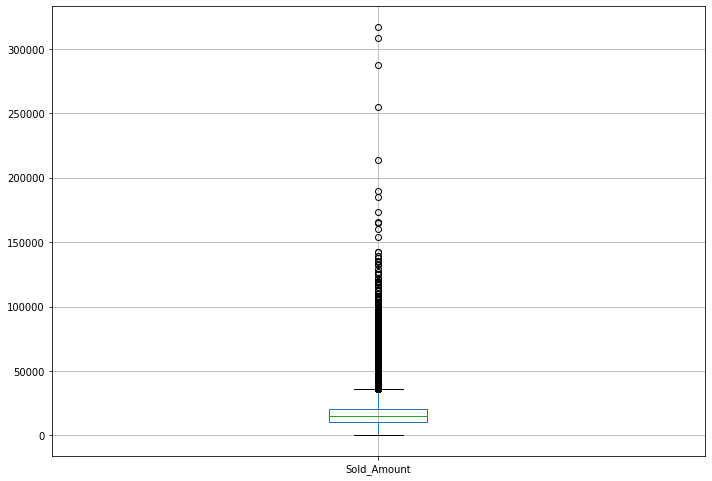

In [550]:
## having a look at the outliers 
df_cars.boxplot(column =['Sold_Amount'], grid = True)

## ML model

### Linear regression model

In [551]:
# instantiate
lm = LinearRegression()

In [552]:
# fit
lm.fit(X_train_imputed, y_train)
# predict 
y_pred_test = lm.predict(X_test_imputed)

In [553]:
# metrics
from sklearn.metrics import r2_score
r2_score_lr = r2_score(y_true=y_test, y_pred=y_pred_test)
r2_score_lr = round(r2_score_lr,2)

In [554]:
r2_score_lr

0.74

In [555]:
from sklearn import metrics
print('Mean Absolute Error:', round(metrics.mean_absolute_error(y_test, y_pred_test),2))
print('Mean Squared Error:', round(metrics.mean_squared_error(y_test, y_pred_test),2))
print('Root Mean Squared Error:', round(np.sqrt(metrics.mean_squared_error(y_test, y_pred_test)),2))

Mean Absolute Error: 3361.49
Mean Squared Error: 29456215.59
Root Mean Squared Error: 5427.36


In [556]:
RMSE_lr = round(np.sqrt(metrics.mean_squared_error(y_test, y_pred_test)),2)

In [557]:
RMSE_lr

5427.36

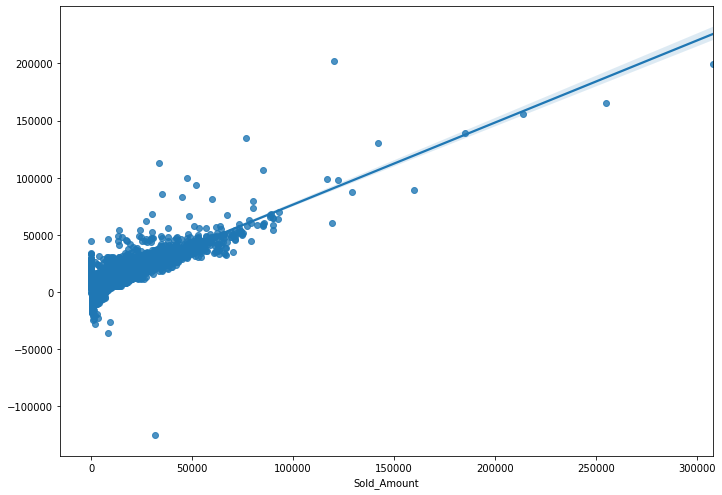

In [558]:
sns.regplot(y_test, y_pred_test)

In [559]:
## checking for overfit 
## if the score range is far from train then there is overfit or underfit issue which is not in this case

In [560]:
# fit
lm.fit(X_train_imputed, y_train)
# predict 
y_pred_train = lm.predict(X_train_imputed)
# metrics
from sklearn.metrics import r2_score
r2_score_lr_if_overfit = r2_score(y_true=y_train, y_pred=y_pred_train)
r2_score_lr_if_overfit = round(r2_score_lr_if_overfit,2)

In [561]:
r2_score_lr_if_overfit

0.71

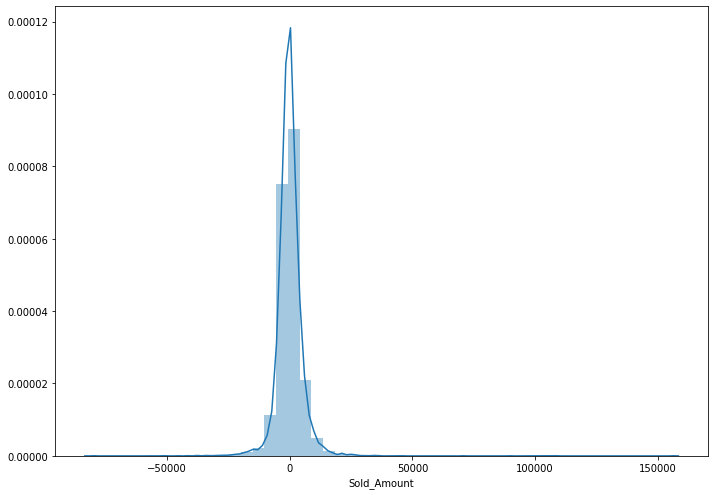

In [562]:
## residual plot shows a normal distribution 
sns.distplot(y_test-y_pred_test)

((array([-3.91832622, -3.69901784, -3.57887644, ...,  3.57887644,
          3.69901784,  3.91832622]),
  array([-81979.  , -79541.  , -58091.  , ...,  89439.  , 108893.  ,
         156858.01])),
 (4858.019181637761, -66.2269814112058, 0.8949501129517355))

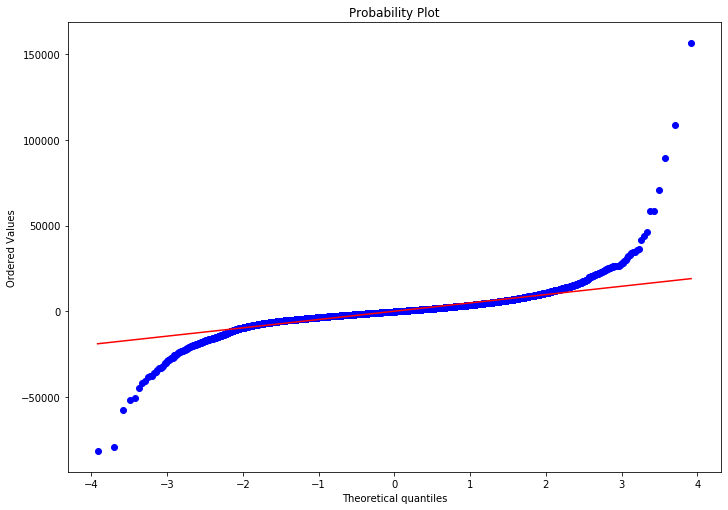

In [563]:
scipy.stats.probplot(y_test-y_pred_test, dist="norm", plot=plt)

### Support Vector regression model

In [564]:
## instantiate
svr = SVR(kernel='rbf')

In [565]:
# fit
svr.fit(X_train_imputed, y_train)
# predict 
y_pred_test = svr.predict(X_test_imputed)
# metrics
from sklearn.metrics import r2_score
r2_score_svr = r2_score(y_true=y_test, y_pred=y_pred_test)
r2_score_svr = round(r2_score_svr,2)

In [566]:
r2_score_svr

0.03

In [567]:
from sklearn import metrics
print('Mean Absolute Error:', round(metrics.mean_absolute_error(y_test, y_pred_test),2))
print('Mean Squared Error:', round(metrics.mean_squared_error(y_test, y_pred_test),2))
print('Root Mean Squared Error:', round(np.sqrt(metrics.mean_squared_error(y_test, y_pred_test)),2))

Mean Absolute Error: 6629.54
Mean Squared Error: 109296724.06
Root Mean Squared Error: 10454.51


In [568]:
RMSE_svr = round(np.sqrt(metrics.mean_squared_error(y_test, y_pred_test)),2)

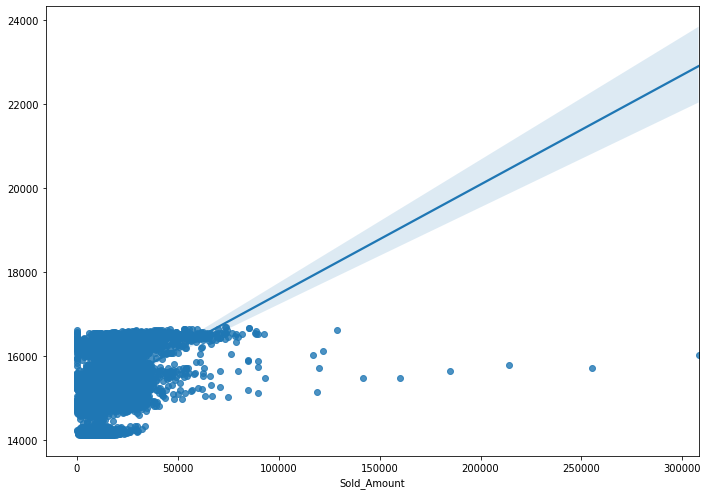

In [569]:
sns.regplot(y_test, y_pred_test)

In [570]:
## checking for overfit 
## if the score range is far from train then there is overfit or underfit issue which is not in this case

In [571]:
# fit
svr.fit(X_train_imputed, y_train)
# predict 
y_pred_train = svr.predict(X_train_imputed)
# metrics
from sklearn.metrics import r2_score
r2_score_svr_if_overfit = r2_score(y_true=y_train, y_pred=y_pred_train)

In [572]:
r2_score_svr_if_overfit

0.031068334426891386

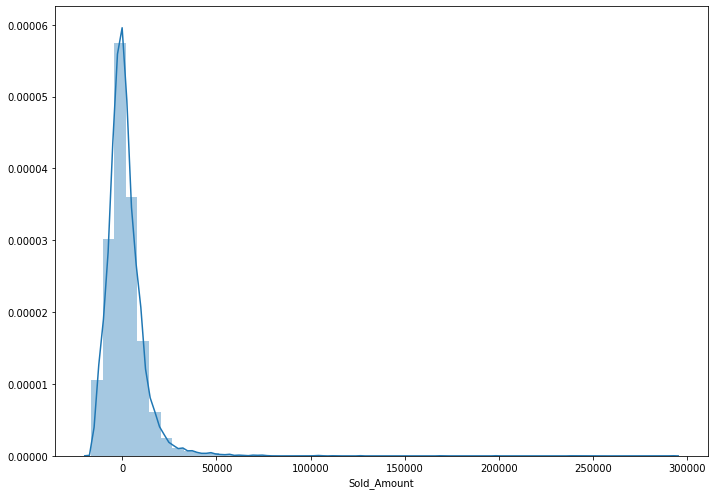

In [573]:
## residual plot shows a normal distribution 
sns.distplot(y_test-y_pred_test)

((array([-3.91832622, -3.69901784, -3.57887644, ...,  3.57887644,
          3.69901784,  3.91832622]),
  array([-16623.13700762, -16571.69924516, -16560.95635398, ...,
         198196.44476142, 239268.92901617, 291966.99809116])),
 (9186.098246613827, 1385.6876358977177, 0.8862821765786498))

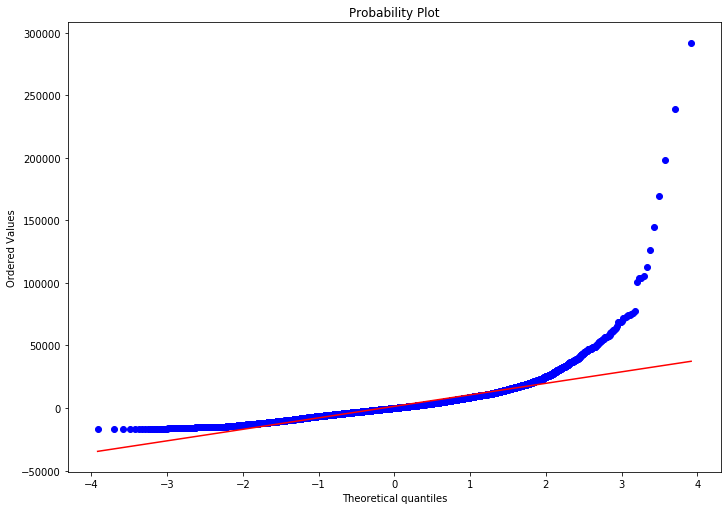

In [574]:
scipy.stats.probplot(y_test-y_pred_test, dist="norm", plot=plt)

In [ ]:
## inverse transform as tree based model doesn't require scaling

In [575]:
X_train_imputed[apply_mm] = mm.inverse_transform(X_train_imputed[apply_mm])

In [576]:
X_test_imputed[apply_mm] = mm.inverse_transform(X_test_imputed[apply_mm])

### Xgboost model

In [579]:
# instantiate
xg=XGBRegressor(n_estimators=500)
## max_depth=3, learning_rate=0.1, n_estimators=500, objective='reg:linear', booster='gbtree'

In [580]:
# fit
xg.fit(X_train_imputed, y_train)
# predict 
y_pred_test = xg.predict(X_test_imputed)
# metrics
from sklearn.metrics import r2_score
r2_score_xg = r2_score(y_true=y_test, y_pred=y_pred_test)
r2_score_xg = round(r2_score_xg,2)

In [581]:
r2_score_xg

0.92

In [582]:
from sklearn import metrics
print('Mean Absolute Error:', round(metrics.mean_absolute_error(y_test, y_pred_test),2))
print('Mean Squared Error:', round(metrics.mean_squared_error(y_test, y_pred_test),2))
print('Root Mean Squared Error:', round(np.sqrt(metrics.mean_squared_error(y_test, y_pred_test)),2))

Mean Absolute Error: 1765.15
Mean Squared Error: 9051569.44
Root Mean Squared Error: 3008.58


In [583]:
RMSE_xg = round(np.sqrt(metrics.mean_squared_error(y_test, y_pred_test)),2)

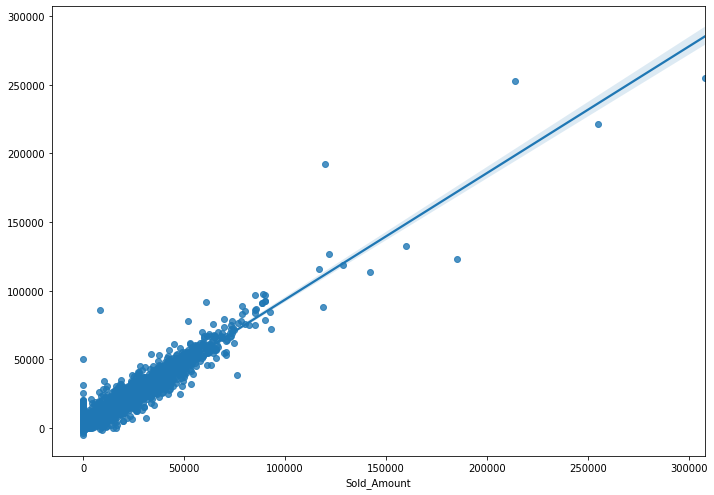

In [584]:
sns.regplot(y_test, y_pred_test)

In [585]:
## checking for overfit 
## if the score range is far from train then there is overfit or underfit issue which is not in this case

In [586]:
# fit
xg.fit(X_train_imputed, y_train)
# predict 
y_pred_train = xg.predict(X_train_imputed)
# metrics
from sklearn.metrics import r2_score
r2_score_xg_if_overfit = r2_score(y_true=y_train, y_pred=y_pred_train)
r2_score_xg_if_overfit = round(r2_score_xg_if_overfit,2)

In [587]:
r2_score_xg_if_overfit

0.98

### Random forest model

In [588]:
rf = RandomForestRegressor(n_estimators = 500, random_state = 0)

In [589]:
# fit
rf.fit(X_train_imputed, y_train)
# predict 
y_pred_test = rf.predict(X_test_imputed)
# metrics
from sklearn.metrics import r2_score
r2_score_rf = r2_score(y_true=y_test, y_pred=y_pred_test)
r2_score_rf = round(r2_score_rf,2)

In [590]:
r2_score_rf

0.91

In [591]:
from sklearn import metrics
print('Mean Absolute Error:', round(metrics.mean_absolute_error(y_test, y_pred_test),2))
print('Mean Squared Error:', round(metrics.mean_squared_error(y_test, y_pred_test),2))
print('Root Mean Squared Error:', round(np.sqrt(metrics.mean_squared_error(y_test, y_pred_test)),2))

Mean Absolute Error: 1890.72
Mean Squared Error: 10513364.91
Root Mean Squared Error: 3242.43


In [592]:
RMSE_rf = round(np.sqrt(metrics.mean_squared_error(y_test, y_pred_test)),2)

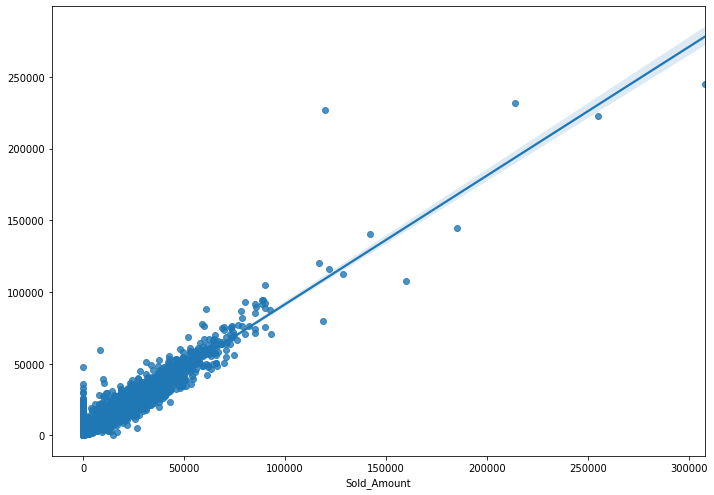

In [593]:
sns.regplot(y_test, y_pred_test)

In [594]:
## checking for overfit 
## if the score range is far from train then there is overfit or underfit issue which is not in this case

In [595]:
# fit
rf.fit(X_train_imputed, y_train)
# predict 
y_pred_train = rf.predict(X_train_imputed)
# metrics
from sklearn.metrics import r2_score
r2_score_rf_if_overfit = r2_score(y_true=y_train, y_pred=y_pred_train)
r2_score_rf_if_overfit = round(r2_score_rf_if_overfit,2)

In [597]:
r2_score_rf_if_overfit

0.99

In [598]:
print(tabulate({'Model': ['Linear Regression', 'SVR', 'XGboost', 'RF model'], 'R2_score_test': [r2_score_lr, r2_score_svr , r2_score_xg, r2_score_rf], 'R2_score_train': [r2_score_lr_if_overfit, r2_score_svr_if_overfit, r2_score_xg_if_overfit, r2_score_rf_if_overfit],  'RMSE': [RMSE_lr, RMSE_svr, RMSE_xg, RMSE_rf]}, headers="keys", tablefmt='fancy_grid'))

╒═══════════════════╤═════════════════╤══════════════════╤══════════╕
│ Model             │   R2_score_test │   R2_score_train │     RMSE │
╞═══════════════════╪═════════════════╪══════════════════╪══════════╡
│ Linear Regression │            0.74 │        0.71      │  5427.36 │
├───────────────────┼─────────────────┼──────────────────┼──────────┤
│ SVR               │            0.03 │        0.0310683 │ 10454.5  │
├───────────────────┼─────────────────┼──────────────────┼──────────┤
│ XGboost           │            0.92 │        0.98      │  3008.58 │
├───────────────────┼─────────────────┼──────────────────┼──────────┤
│ RF model          │            0.91 │        0.99      │  3242.43 │
╘═══════════════════╧═════════════════╧══════════════════╧══════════╛
